<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/heights_weights/heights_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sex, Height, and Weight

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.stats as stats

In [2]:
# Read the dataaset from the specified URL
df = pd.read_csv("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/heights-and-weights/sex_height_weight.csv")
df.shape

(1000, 4)

In [3]:
df.head() # Display the the head of the dataset

,Name,Sex,Height,Weight
0,Jennifer Winters,Female,165.0,71.2
1,William Hall,Female,161.2,67.4
2,Jennifer Gill,Male,179.5,75.6
3,Maria Flynn,Male,185.7,68.5
4,Kevin Abbott,Male,173.4,82.0


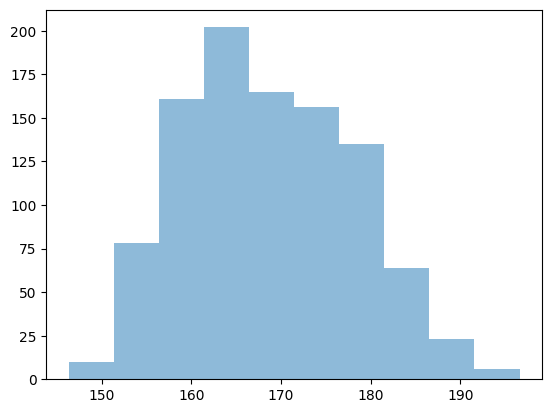

In [4]:
pyplot.hist(df['Height'], alpha=0.5) # Histogram for the population (males and females) heights
pyplot.show()

In [5]:
np.mean(df['Height']) # mean of the  population height (males and females, together)

168.69769999999997

In [6]:
df.groupby('Sex').size() # Group by Sex to find how many rows for each sex

Sex
Female    496
Male      504
dtype: int64

In [7]:
males_heights = df.loc[df['Sex'] == 'Male']['Height'] # Extract the height of the males
males_heights.head()

2    179.5
3    185.7
4    173.4
5    173.4
7    180.4
Name: Height, dtype: float64

In [8]:
females_heights = df.loc[df['Sex'] == 'Female']['Height']  # Extract the height of the females
females_heights.head()

0    165.0
1    161.2
6    171.5
8    159.2
9    165.3
Name: Height, dtype: float64

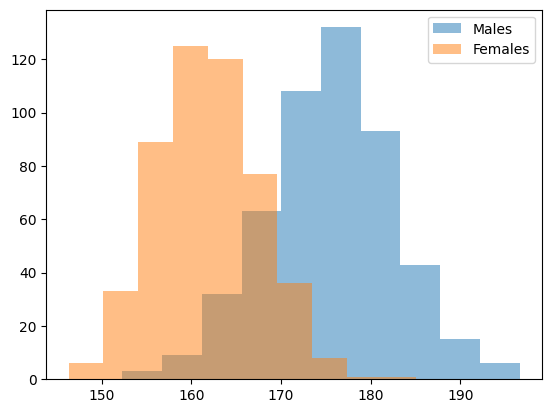

In [9]:
pyplot.hist(males_heights, alpha=0.5, label='Males') # Histogram for the males heights
pyplot.hist(females_heights, alpha=0.5, label='Females') # Histogram for the females heights
pyplot.legend(loc='upper right')
pyplot.show()

In [10]:
np.mean(males_heights) # the mean of the males heights

175.41488095238097

In [11]:
np.mean(females_heights) # the mean of the females heights

161.87217741935484

## Statistical Significance in the difference between the heights according to the sex

In [12]:
stats.ttest_ind(a=males_heights, b=females_heights)

Ttest_indResult(statistic=33.34828635993142, pvalue=1.9012441400770298e-164)

The above t-test shows statistical significance p-value (1.16e-150 is much smaller than 0.05)

In [13]:
sample1 = males_heights.sample(n=10)
sample1

781    165.7
809    168.7
343    171.5
590    175.5
748    170.7
298    180.7
823    172.5
247    170.4
48     177.4
403    175.3
Name: Height, dtype: float64

In [14]:
np.mean(sample1)

172.83999999999997

In [15]:
sample2 = males_heights.sample(n=10)
sample2

828    172.1
634    167.9
7      180.4
748    170.7
674    165.1
461    175.2
487    167.4
991    160.7
939    171.1
834    174.8
Name: Height, dtype: float64

In [16]:
np.mean(sample2)

170.54

In [17]:
np.mean(sample1) - np.mean(sample2)

2.299999999999983

In [18]:
stats.ttest_ind(a=sample1, b=sample2)

Ttest_indResult(statistic=1.0180490933114394, pvalue=0.3221439659797273)

In [19]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = males_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

0.006431999999999982

(array([  15.,   98.,  465., 1418., 2451., 2692., 1889.,  752.,  197.,
          23.]),
 array([-11.74,  -9.48,  -7.22,  -4.96,  -2.7 ,  -0.44,   1.82,   4.08,
          6.34,   8.6 ,  10.86]),
 <BarContainer object of 10 artists>)

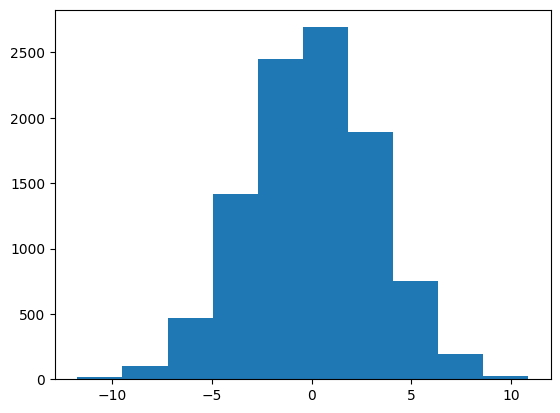

In [20]:
pyplot.hist(x=diff)

In [21]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = females_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

13.534130000000001

(array([  29.,  192.,  724., 1801., 2722., 2591., 1386.,  452.,   89.,
          14.]),
 array([ 3.58 ,  5.644,  7.708,  9.772, 11.836, 13.9  , 15.964, 18.028,
        20.092, 22.156, 24.22 ]),
 <BarContainer object of 10 artists>)

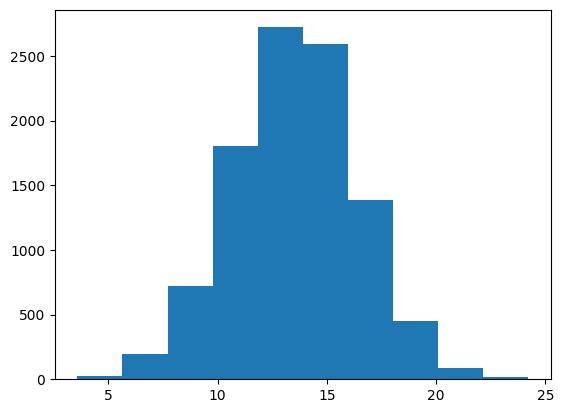

In [22]:
pyplot.hist(x=diff)